Import modules:

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

Parameters:

In [2]:
m = 1
v = 10
epsilon = 0.3
tau0 = 0.4
tau1 = 0.1
kappa = 0.4

**Question 1**

Functions:

In [3]:
# a. utility_function

def utility_function(c,l,v=v,epsilon=epsilon):
    return np.log(c) - v*(l**(1+1/epsilon)/(1+1/epsilon))

# b. c_function, where c* = x becuase of monoticity 

def c_function(l,w,m=m,tau0=tau0,tau1=tau1,kappa=kappa):
    return m + w*l - (tau0*w*l + tau1*np.max(w*l-kappa,0))

# c. utility_constrained, where c = c_function

def utility_constrained(l,w,v=v,epsilon=epsilon,tau0=tau0,tau1=tau1,kappa=kappa):
    c = c_function(l,w,m=m,tau0=tau0,tau1=tau1,kappa=kappa)
    return utility_function(c,l,v,epsilon)

Solution function:

In [4]:
def solution_function(w,v=v,epsilon=epsilon,tau0=tau0,tau1=tau1,kappa=kappa):  
    bounds = [(0,1)]
    initial_guess = 0.5
    l_optimal = optimize.minimize(
        lambda l: -utility_constrained(l,w,v=v,epsilon=epsilon,tau0=tau0,tau1=tau1,kappa=kappa),
        initial_guess,method='SLSQP',bounds=bounds)
    return l_optimal
    print(l_optimal.message) # check that the solver has terminated correctly (place here; l_optimal defined localy)

# check optimizer 
print(solution_function(1)) # test optimizer: w = 1
print(solution_function(1,epsilon=0.1)) # test change epsilon from default

     fun: -0.17217215210801498
     jac: array([-0.00121016])
 message: 'Optimization terminated successfully.'
    nfev: 16
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.3821357])
     fun: -0.31199493326030237
     jac: array([-0.00055652])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.71658795])


**Question 2**

Plot $\ell^*$ and $c^*$ as functions of $w\in(0.5,1.5)$:

[0.5        0.61111111 0.72222222 0.83333333 0.94444444 1.05555556
 1.16666667 1.27777778 1.38888889 1.5       ]
[0.31955951 0.33733084 0.35246176 0.36559671 0.37677329 0.38720119
 0.39654554 0.404984   0.41266128 0.41968386]
[1.11988988 1.14307331 1.16727786 1.19233196 1.21792072 1.24435619
 1.27131823 1.29873978 1.32657033 1.3547629 ]


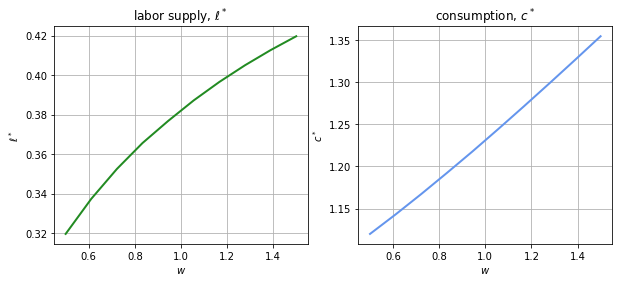

In [5]:
# setup
M = 10
w_vec = np.linspace(0.5,1.5,M) # Return evenly spaced numbers over a specified interval
l_vec = np.empty(M) # Return a new array of given (same M) shape and type, without initializing entries
c_vec = np.empty(M)

print(w_vec) # check elements    

# a. optimal l => loop through w and adding solutions for l to l_vec
for i,w in enumerate(w_vec):
    l_vec[i] = solution_function(w).x[0]
    
print(l_vec) # check elements

# b. optimal c
for i,w in enumerate(w_vec):
    l = solution_function(w).x[0]
    c_vec[i] = c_function(l,w)

print(c_vec) # check elements

# c. figure
fig = plt.figure(figsize = (10,4))

# I. left plot
ax_left = fig.add_subplot(1,2,1)
ax_left.plot(w_vec,l_vec,lw=2,color='forestgreen')

ax_left.set_title('labor supply, $\ell^*$')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$\ell^*$')
ax_left.grid(True)

# II. right plot
ax_right = fig.add_subplot(1,2,2)
ax_right.plot(w_vec,c_vec,lw=2,color='cornflowerblue')

ax_right.set_title('consumption, $c^*$')
ax_right.set_xlabel('$w$')
ax_right.set_ylabel('$c^*$')
ax_right.grid(True)

**Question 3**

Parameters:

In [6]:
seed = 123
N = 10
lower = 0.5
upper = 1.5

Draw individual wages from uniform distribution $w_i\sim\mathcal{U}(0.5,1.5)$:

In [7]:
np.random.seed(seed)
w_random_vec = np.random.uniform(low=lower,high=upper,size=N)

# check w_random_vec
print(type(w_random_vec)) # check type
print(w_random_vec) # check elements

<class 'numpy.ndarray'>
[1.19646919 0.78613933 0.72685145 1.05131477 1.21946897 0.92310646
 1.4807642  1.18482974 0.9809319  0.89211752]


Optimal labor for all consumers $\ell_i^*,\forall i$:

In [8]:
def optimal_labor_inputs(w_random_vec=w_random_vec,epsilon=epsilon,tau0=tau0,tau1=tau1,kappa=kappa):
    l_optimal_vec = np.empty(N) # Return a new array of given (same N) shape and type, without initializing entries

    # optimal l for consumer i
    for i,w in enumerate(w_random_vec):
        l_optimal_vec[i] = solution_function(w,epsilon=epsilon,tau0=tau0,tau1=tau1,kappa=kappa).x[0]

    # optimal c is irelevant
    
    return l_optimal_vec

In [9]:
print(optimal_labor_inputs())

[0.39889149 0.36023043 0.35304532 0.38682436 0.40065937 0.37462839
 0.4185121  0.39798281 0.38033012 0.37142341]


Total tax revenue $T$:

In [10]:
def tax_revenue(w_random_vec=w_random_vec,epsilon=epsilon,tau0=tau0,tau1=tau1,kappa=kappa):

    l_optimal_vec = optimal_labor_inputs(w_random_vec=w_random_vec,epsilon=epsilon,tau0=tau0,tau1=tau1,kappa=kappa)

    sum = 0
    for i in range(N):
        w = w_random_vec[i]
        l = l_optimal_vec[i]
        sum += tau0*w*l+tau1*np.max(w*l-kappa,0)
    return sum

In [11]:
print(tax_revenue())

1.6269213948615846


**Question 4**

Parameter:

In [12]:
epsilon_new = 0.1

Tax revenue:

In [13]:
print(tax_revenue(epsilon = epsilon_new))

3.358019689712616


**Fortolkning**: epsilon falder => elasticitet på arbejdskraft falder (mere inelastisk) => mindre DWL ved beskatning => større skatteproenu

**Question 5**

Maximize total tax revenue $T$ with respect to $\tau_0, \tau_1$ and $\kappa$:

In [29]:
# a. objective function (to minimize)
def objective_function(x,w_random_vec=w_random_vec,epsilon=epsilon):
    # note: x is a vector
    tau0 = x[0]
    tau1 = x[1]
    kappa = x[2]
    return -tax_revenue(w_random_vec=w_random_vec,epsilon=epsilon,tau0=tau0,tau1=tau1,kappa=kappa)

# b. bounds
bounds = [(0,1),(0,1),(0,None)]

# c. call solver
initial_guess = [0.4,0.1,0.4]
res = optimize.minimize(
    objective_function,initial_guess,args=(w_random_vec,epsilon),
    method='SLSQP',bounds=bounds)

# d. unpack solution
tau0 = res.x[0]
tau1 = res.x[1]
kappa = res.x[2]
print(tau0)
print(tau1)
print(kappa)
print(res.message)
print(tax_revenue(tau0=tau0,tau1=tau1,kappa=kappa)) # max tax revenue
print(tax_revenue(tau0=0.76,tau1=tau1,kappa=kappa)) # lower tax revenue
print(tax_revenue(tau0=0.78,tau1=tau1,kappa=kappa)) # lower tax revenue

0.774971696346691
0.011600727261927605
0.0
Optimization terminated successfully.
2.5885068264594158
2.5866041573328635
2.588090956035067


**Optimal tax system**: One single tax rate $\tau_0+\tau_1$, where there is no cut off $\kappa=0$ (the tax is levied as an equal proportion of income on every consumer). Optimal tax rate is positive, but less than 1, which is in line with the prediction of the Laffer curve. Additionally, a rate of 70%-80% is similar to those of empirical estimates.

**Husk**: \
Metode til at håndtere mange parametre \
Figurer: interaktive, 3d-plot, justering af akser/ticks, \
Kode: mere kompakt, kommentarer, specificer input/output \
Tekst: resultat præsenteres \
Loop: N = 10000 forbrugere